In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
a = np.linspace(1,6,6)
print(a, a.shape)

[1. 2. 3. 4. 5. 6.] (6,)


In [10]:
b = np.resize(a,(10, 4,6))
print('b[0] \n', b[0],'\n\nb[9] \n',b[9])

b[0] 
 [[1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]] 

b[9] 
 [[1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]
 [1. 2. 3. 4. 5. 6.]]


In [11]:
b = np.resize(a, (6,1))
print(b, b.shape)

[[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]] (6, 1)


In [12]:
a*b

array([[ 1.,  2.,  3.,  4.,  5.,  6.],
       [ 2.,  4.,  6.,  8., 10., 12.],
       [ 3.,  6.,  9., 12., 15., 18.],
       [ 4.,  8., 12., 16., 20., 24.],
       [ 5., 10., 15., 20., 25., 30.],
       [ 6., 12., 18., 24., 30., 36.]])

**Now some "concrete" example**

Let us consider a set of random number and lets sequencially reduce their values up to zero, through an exponencial decay!

In [80]:
L = 3                       # number of points
x = np.random.random(L)     # random numbers between [0 and 1)
x.sort(axis=0)
x = np.resize(x,(1,L))      # to make the object 2D
print(x,x.shape)

[[0.16291832 0.4237554  0.83228316]] (1, 3)


Now let us create a "time variable", to carry on the values of time and, then reshape it so that it is possible to use broadcasting rules to make a produte a create an evolution of x in time.

In [87]:
r = 20 # sample size
t = np.linspace(0.0,5.0,r)
t = np.resize(t,(r,1))
scale = np.exp(-t)


Note that now the variable `t` now is ortogonal to `x`! Let us now use broadcasting rules and see what happens!

In [88]:
data = x*scale
data

array([[0.16291832, 0.4237554 , 0.83228316],
       [0.12522237, 0.3257071 , 0.63970992],
       [0.09624848, 0.25034516, 0.49169417],
       [0.07397856, 0.19242043, 0.37792623],
       [0.05686144, 0.14789829, 0.29048186],
       [0.04370487, 0.11367766, 0.22327032],
       [0.03359246, 0.08737499, 0.17161015],
       [0.02581985, 0.06715821, 0.13190309],
       [0.01984567, 0.05161918, 0.10138342],
       [0.01525379, 0.03967556, 0.07792538],
       [0.01172438, 0.03049545, 0.05989504],
       [0.0090116 , 0.02343943, 0.04603656],
       [0.0069265 , 0.01801603, 0.03538465],
       [0.00532385, 0.01384749, 0.02719736],
       [0.00409202, 0.01064346, 0.02090445],
       [0.00314521, 0.00818078, 0.01606759],
       [0.00241747, 0.00628792, 0.01234988],
       [0.00185812, 0.00483302, 0.00949237],
       [0.00142819, 0.00371476, 0.00729603],
       [0.00109774, 0.00285524, 0.00560788]])

It should be interesting to plot all this to check whether it is OK!

In [89]:
t

array([[0.        ],
       [0.26315789],
       [0.52631579],
       [0.78947368],
       [1.05263158],
       [1.31578947],
       [1.57894737],
       [1.84210526],
       [2.10526316],
       [2.36842105],
       [2.63157895],
       [2.89473684],
       [3.15789474],
       [3.42105263],
       [3.68421053],
       [3.94736842],
       [4.21052632],
       [4.47368421],
       [4.73684211],
       [5.        ]])

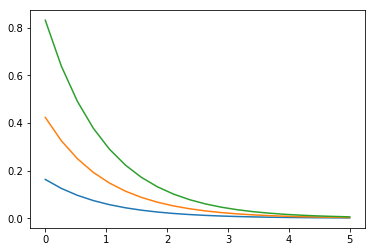

In [90]:
for i in range(L):
    vx = data[:,i]    
    vt = np.resize(t,(r))
    vx, vt
    plt.plot( vt, vx)

plt.show()